<a href="https://colab.research.google.com/github/Sachinsn19/Gold-Price-Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Analysing
About dataset : [gold price data](https://www.kaggle.com/altruistdelhite04/gold-price-data)

This data file is a Comma separated value file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.

In [45]:
#Loading the dataset into Pandas Dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [46]:
#Priting top 5 rows of the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [47]:
#Printing last 5 rows of the data
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [48]:
#Number of rows and columns
gold_data.shape

(2290, 6)

In [49]:
#Getting basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [50]:
#Checking for missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [51]:
# Getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation

* Positive correlation
* Negative correlation

In [52]:
correltion = gold_data.corr()

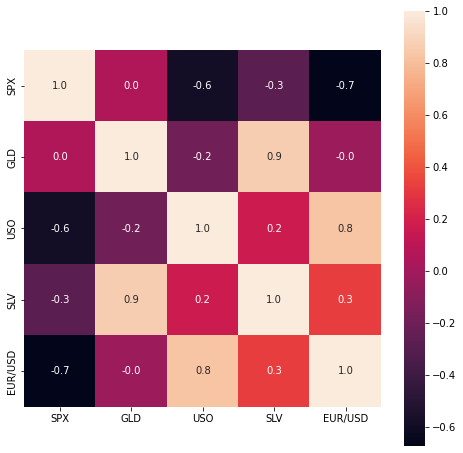

In [53]:
#Constructing heatmap to understand correlation
plot = plt.figure(figsize=(8,8))
sns.heatmap(data=correltion,annot=True, annot_kws={'size':10}, fmt=".1f",cbar=True, square=True)
plt.show()

In [54]:
#Correlation values
gold_data.corr()['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

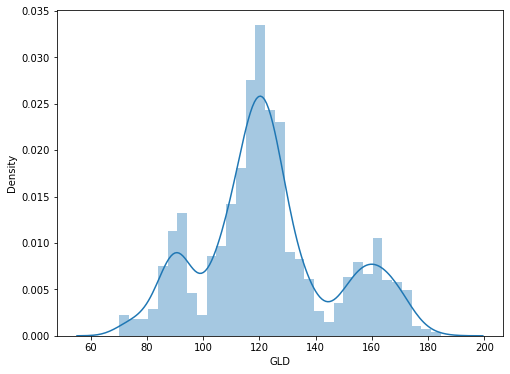

In [55]:
#Checking the distribution of gold price
plot = plt.figure(figsize=(8,6))
sns.distplot(gold_data['GLD'])
plt.show()

# Splitting Features and Targets

In [56]:
 X = gold_data.drop(['GLD','Date'], axis=1)
 y = gold_data['GLD']

In [57]:
print(X)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Train Test Split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=2)

In [59]:
print(X.shape,X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


## Model Training

In [60]:
model = RandomForestRegressor()

In [61]:
#Training the model
model.fit(X_train, y_train)

RandomForestRegressor()

## Model Evaluation

In [62]:
#Prediction on train data
train_data_prediction = model.predict(X_train)

In [63]:
#R squared error on Train data
error_score = metrics.r2_score(y_train, train_data_prediction)
print("R square value in Train data  : ",error_score)

R square value in Train data  :  0.9985300549588594


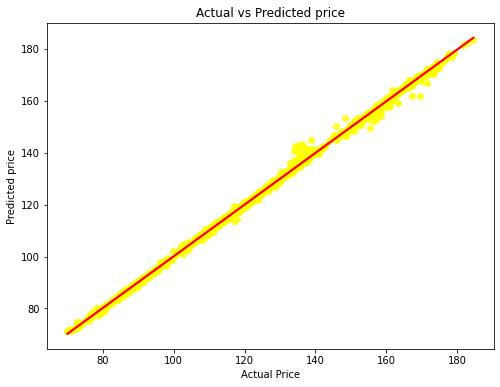

In [72]:
plot = plt.figure(figsize=(8,6))
sns.regplot(x=y_train, y=train_data_prediction,scatter_kws={"color": "yellow"},line_kws={"color": "red"})
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted price")
plt.show()

In [73]:
#Prediction on test data
test_data_prediction = model.predict(X_test)

In [74]:
#R squared error on Test data
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R square value in Train data  : ",error_score)

R square value in Train data  :  0.9887816476098193


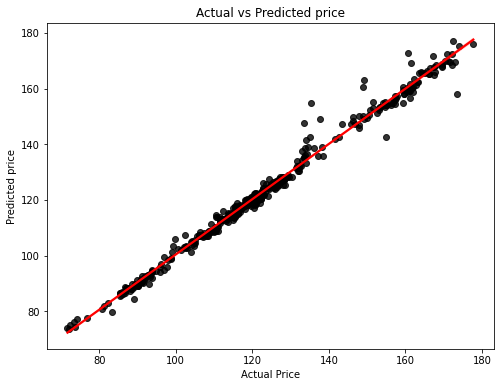

In [76]:
plot = plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=test_data_prediction,scatter_kws={"color": "black"},line_kws={"color": "red"})
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted price")
plt.show()

# ............................THANK YOU........................................